In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Leer el archivo CSV
data = pd.read_csv('./data/processed.csv')

In [4]:
# Ver las primeras filas del dataframe
print(data.head())

   User-ID  Book-Rating                                        Book-Title  \
0   276725            0                              Flesh Tones: A Novel   
1     2313            5                              Flesh Tones: A Novel   
2     2313            9     Ender's Game (Ender Wiggins Saga (Paperback))   
3     2313            8             In Cold Blood (Vintage International)   
4     2313            9  Divine Secrets of the Ya-Ya Sisterhood : A Novel   

        Book-Author  Year-Of-Publication         Publisher  \
0        M. J. Rose                 2002  Ballantine Books   
1        M. J. Rose                 2002  Ballantine Books   
2  Orson Scott Card                 1986         Tor Books   
3     TRUMAN CAPOTE                 1994           Vintage   
4     Rebecca Wells                 1996     HarperCollins   

                Location  Age  
0      tyler, texas, usa   34  
1  cincinnati, ohio, usa   23  
2  cincinnati, ohio, usa   23  
3  cincinnati, ohio, usa   23  
4  c

In [5]:
# Resumen estadístico de las variables numéricas
print(data.describe())

            User-ID   Book-Rating  Year-Of-Publication           Age
count  1.031129e+06  1.031129e+06         1.031129e+06  1.031129e+06
mean   1.405945e+05  2.839039e+00         1.968195e+03  3.648217e+01
std    8.052485e+04  3.854152e+00         2.311018e+02  1.214405e+01
min    2.000000e+00  0.000000e+00         0.000000e+00  0.000000e+00
25%    7.041500e+04  0.000000e+00         1.992000e+03  3.100000e+01
50%    1.412100e+05  0.000000e+00         1.997000e+03  3.400000e+01
75%    2.114260e+05  7.000000e+00         2.001000e+03  4.100000e+01
max    2.788540e+05  1.000000e+01         2.050000e+03  2.440000e+02


In [6]:
# Resumen de información del DataFrame, incluyendo los tipos de datos y los valores nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031129 entries, 0 to 1031128
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031129 non-null  int64 
 1   Book-Rating          1031129 non-null  int64 
 2   Book-Title           1031129 non-null  object
 3   Book-Author          1031129 non-null  object
 4   Year-Of-Publication  1031129 non-null  int64 
 5   Publisher            1031129 non-null  object
 6   Location             1031129 non-null  object
 7   Age                  1031129 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 62.9+ MB
None


In [7]:
# Conteo de valores únicos para ver la cardinalidad
print(data.nunique())

User-ID                 92106
Book-Rating                11
Book-Title             241066
Book-Author            101585
Year-Of-Publication       116
Publisher               16725
Location                22480
Age                       141
dtype: int64


In [8]:
# Conteo de valores de ratings para ver la distribución
print(data['Book-Rating'].value_counts())

0     647291
8      91803
10     71225
7      66401
9      60776
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64


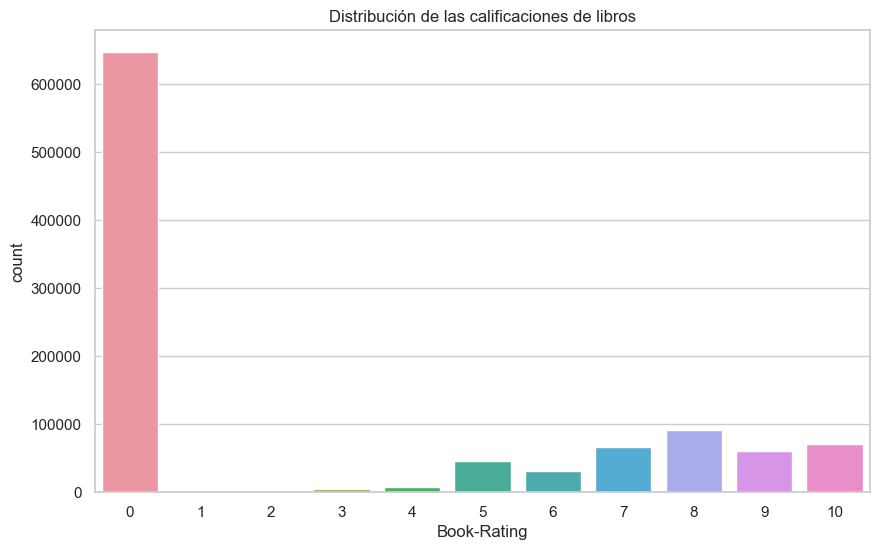

In [9]:
# Visualizar la distribución de las calificaciones
sns.countplot(x='Book-Rating', data=data)
plt.title('Distribución de las calificaciones de libros')
plt.show()

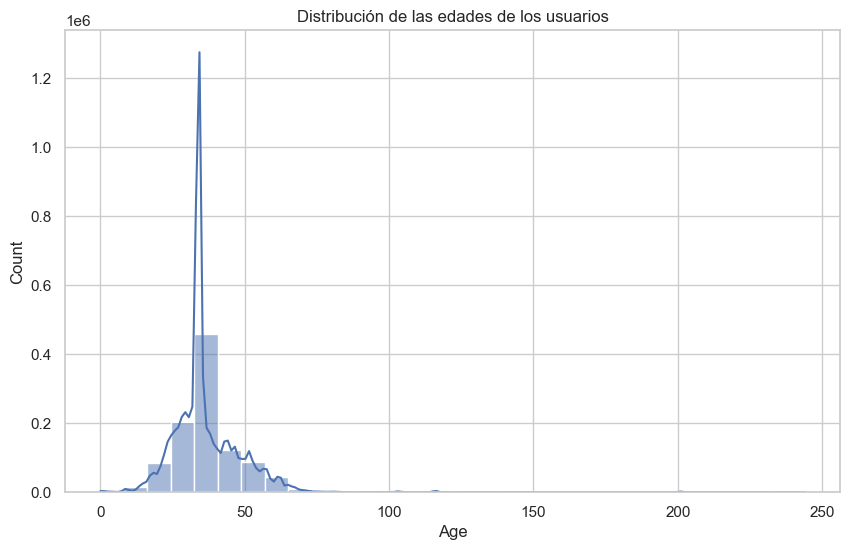

In [10]:
# Visualizar la distribución de edades
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Distribución de las edades de los usuarios')
plt.show()

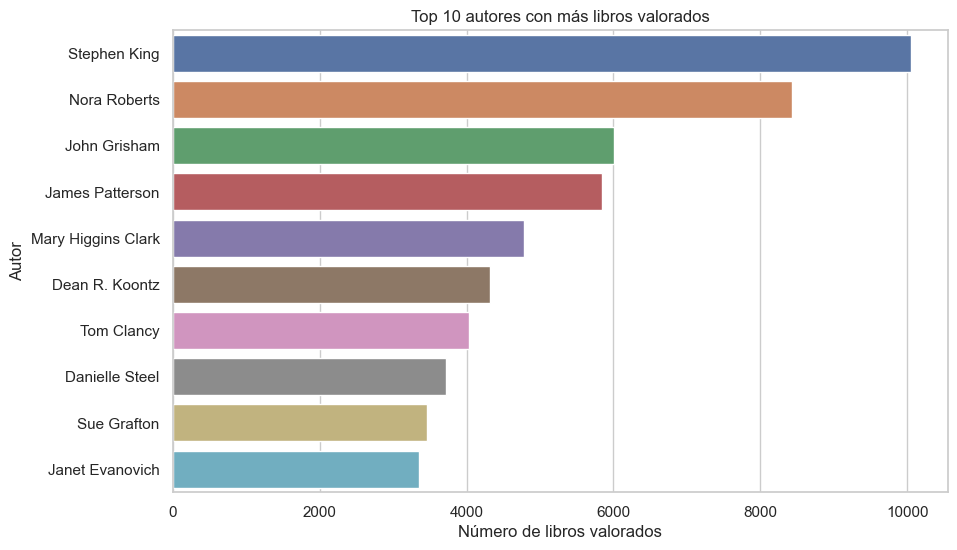

In [11]:
# Top 10 autores con más libros valorados
top_authors = data['Book-Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 autores con más libros valorados')
plt.xlabel('Número de libros valorados')
plt.ylabel('Autor')
plt.show()

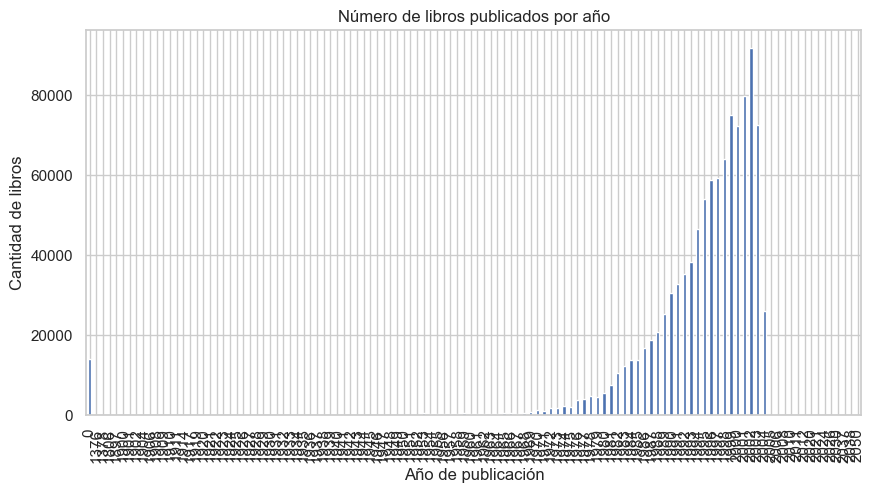

In [12]:
# Análisis de la columna 'Year-Of-Publication'
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], errors='coerce') # Convertir a numérico y manejar errores
data['Year-Of-Publication'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Número de libros publicados por año')
plt.xlabel('Año de publicación')
plt.ylabel('Cantidad de libros')
plt.show()